In [1]:
import numpy as np
from keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import random 

In [2]:
data=mnist
(train_img,train_lab),(test_img,test_lab)=data.load_data()

In [3]:
train_img_concat=[]
train_lab_concat=[]
test_img_concat=[]
test_lab_concat=[]

In [4]:

for i in range(500000):
    a=random.randint(0,59999)
    b=random.randint(0,59999)
    train_img_concat.append(np.concatenate((train_img[a],train_img[b]),axis=1))
    train_lab_concat.append(np.uint8(str(train_lab[a])+str(train_lab[b])))

for i in range(8000):
    a=random.randint(0,9999)
    b=random.randint(0,9999)
    test_img_concat.append(np.concatenate((test_img[a],test_img[b]),axis=1))
    test_lab_concat.append(np.uint8(str(test_lab[a])+str(test_lab[b])))
    


In [5]:
train_img_concat=np.array(train_img_concat)
train_lab_concat=np.array(train_lab_concat)
test_img_concat=np.array(train_img_concat)
test_lab_concat=np.array(train_lab_concat)

In [7]:
test_img_concat.shape

(500000, 28, 56)

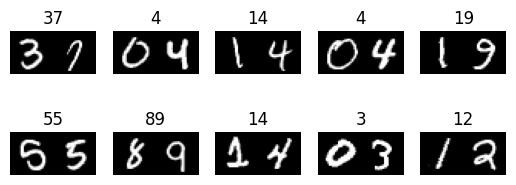

In [6]:
for i in range(10):
    plt.subplot(4,5,i+1)
    plt.imshow(train_img_concat[i],cmap='grey')
    plt.title(train_lab_concat[i])
    plt.subplots_adjust(hspace=0.5)
    plt.axis("off")

In [7]:
train_img_concat=train_img_concat/255
test_img_concat=test_img_concat/255

In [ ]:
# train_img_concat[train_img_concat >= 0.5] = 1
# train_img_concat[train_img_concat < 0.5] = 0
# test_img_concat[test_img_concat >= 0.5] = 1
# test_img_concat[test_img_concat < 0.5] = 0
 

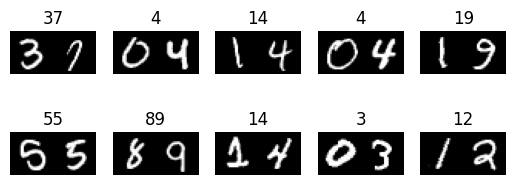

In [8]:
for i in range(10):
    plt.subplot(4,5,i+1)
    plt.imshow(train_img_concat[i],cmap='grey')
    plt.title(train_lab_concat[i])
    plt.subplots_adjust(hspace=0.5)
    plt.axis("off")

In [9]:
len(np.unique(test_lab_concat))

100

In [38]:
from keras.models import Sequential 
from keras.layers import Flatten,Dense,Dropout

model=Sequential()

input_layer=Flatten(input_shape=(28,56))
hidden_layer1=Dense(512,activation='relu')
hidden_layer2=Dense(1024,activation='relu')
hidden_layer3=Dense(2048,activation='relu')
output_layer=Dense(100,activation='softmax')

model.add(input_layer)
model.add(hidden_layer1)
# model.add(Dropout(0.2))
model.add(hidden_layer2)
# model.add(Dropout(0.2))
model.add(hidden_layer3)
model.add(output_layer)

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
train_img_concat.shape

(500000, 28, 56)

In [41]:
model.fit(train_img_concat,train_lab_concat,epochs=10,validation_data=(test_img_concat,test_lab_concat))

Epoch 1/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 578s 37ms/step - accuracy: 0.8480 - loss: 0.5436 - val_accuracy: 0.9636 - val_loss: 0.1216
Epoch 2/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 521s 33ms/step - accuracy: 0.9631 - loss: 0.1266 - val_accuracy: 0.9744 - val_loss: 0.0861
Epoch 3/10
  859/15625 ━━━━━━━━━━━━━━━━━━━━ 7:24 30ms/step - accuracy: 0.9751 - loss: 0.0922

KeyboardInterrupt: 

In [ ]:
model.save('projectdoubledigitsnew1.keras')

In [30]:
lossacc=model.evaluate(test_img_concat,test_lab_concat)

15625/15625 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9783 - loss: 0.0703


In [42]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [43]:
def load_image(filename):
    img=load_img(filename,color_mode='grayscale', target_size=(28,56))
    img=img_to_array(img)
    print(img.shape)
    img=img.reshape(1,28,56)
    # img[train_img_concat >= 0.5] = 1
    # img[train_img_concat < 0.5] = 0
    plt.subplot(4,5,1)
    plt.imshow(img[0],cmap='grey')
    plt.title('test')
    plt.subplots_adjust(hspace=0.5)
    plt.axis("off")
    img.astype('float32')
    img=img/255.0
    return img


(28, 56, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
53 [[1.56975091e-08 1.97740496e-06 6.46603496e-07 1.08698796e-05
  4.28509475e-06 2.39814835e-09 9.88183047e-08 3.81912855e-07
  7.22038862e-07 5.35244773e-08 1.75135391e-08 2.74897521e-10
  4.07922869e-07 4.62514066e-07 9.43365741e-09 1.40836483e-11
  3.12650461e-09 2.58994355e-08 2.62133284e-08 7.58293339e-09
  9.09922804e-08 1.00921282e-09 1.09345187e-07 1.17377404e-07
  1.11503304e-07 1.23049224e-10 1.64367586e-09 1.64482117e-08
  1.45932108e-06 5.22740784e-09 3.60093291e-05 8.46622640e-07
  3.66672873e-04 3.86186701e-04 1.10815483e-04 2.15993259e-05
  4.77003778e-05 1.17775533e-04 5.64177208e-05 1.68867318e-05
  1.99070649e-10 8.43533021e-10 2.12225109e-06 4.03465037e-07
  5.17557567e-07 8.28619950e-10 6.21552374e-08 1.81164470e-08
  9.64522062e-09 8.29494362e-10 1.67097300e-02 1.78487841e-02
  2.67301291e-01 3.33704650e-01 1.18637614e-01 2.64539700e-02
  9.31435004e-02 4.32106853e-02 4.42853943e-02 3.64016742e-02
  1.83954069e-06 

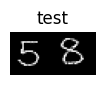

In [47]:
res=0
img=load_image('doubdigtest5.png')
# model=load_model('projectdoubledigits.keras')
res=model.predict(img)
print(np.argmax(res),res)